In [22]:
import numpy as np
import pandas as pd
import os
import sys

from IPython.display import display
from scipy.stats import pearsonr
from scipy.cluster import hierarchy as hac

from matplotlib import pyplot as plt

In [31]:
cc_dir = '../../2001/output/cross_corr/'
gam_ac_dir = '../../2001/output/auto_gam/'


In [38]:
object_arr = np.arange(0,50)

c_matrix = np.zeros(int(len(object_arr)*(len(object_arr)-1)/2))

index = 0
for ii in range(0,len(object_arr)):
	obj1 = object_arr[ii]
	
	''' CC1 '''
	cc_file1 = cc_dir+'object'+str(obj1).zfill(4)+'_stats000.dat'
	
	read_in = np.loadtxt(cc_file1)

	time = read_in[0]
	data = read_in[1:]
	
	arr_time = np.logical_and(time >= -1000, time <= 2000)
	data = data[:,arr_time]
	
	cor_mean = data[0,::5]
# 	cor_err_d = cor_mean-data[1]
# 	cor_err_u = data[2]-cor_mean
	
	arr1 = np.logical_and(np.isfinite(cor_mean), cor_mean > -1.1)
	
	''' AC-gam '''
	ac_gam_file1 = gam_ac_dir+'object'+str(obj1).zfill(4)+'_auto_gam_stats000.dat'
	
	read_in = np.loadtxt(ac_gam_file1)
	time = read_in[0]
	data = read_in[1:]
	arr_time_acg = time <= 2000
	data = data[:,arr_time_acg]

	acg_mean1 = data[0,::5]
	
	arr1_acg = np.logical_and(np.isfinite(acg_mean1), acg_mean1 > -1.1)
	
	for jj in range(ii+1, len(object_arr)):
		obj2 = object_arr[jj]
		cc_file2 = cc_dir+'object'+str(obj2).zfill(4)+'_stats000.dat'

		read_in = np.loadtxt(cc_file2)
		data = read_in[1:]
		data = data[:,arr_time]

		cor_mean2 = data[0,::5]
# 		cor_err_d2 = cor_mean-data[1]
# 		cor_err_u2 = data[2]-cor_mean
		
		arr2 = np.logical_and(np.isfinite(cor_mean2), cor_mean > -1.1)
		arr_tot = np.logical_and(arr1, arr2)
		
		x_cc = cor_mean[arr_tot]
		y_cc = cor_mean2[arr_tot]
		
		cc_corr, cc_pval = pearsonr(x_cc,y_cc)
		
		
		''' AC-gam '''
		ac_gam_file2 = gam_ac_dir+'object'+str(obj2).zfill(4)+'_auto_gam_stats000.dat'

		read_in = np.loadtxt(ac_gam_file2)
		data = read_in[1:]
		data = data[:,arr_time_acg]

		acg_mean2 = data[0,::5]
		arr2_acg = np.logical_and(np.isfinite(acg_mean2), acg_mean2 > -1.1)
		
		arr_tot_acg = np.logical_and(arr1_acg, arr2_acg)
		x_acg = acg_mean1[arr_tot_acg]
		y_acg = acg_mean2[arr_tot_acg]
		
		acg_corr, acg_pval = pearsonr(x_acg, y_acg)
		
		
		c_matrix[index] = (1.-cc_corr)**2 + (1.-acg_corr)**2
# 		print([obj1, obj2], end='')
		index+= 1
	print(obj1, end=' ')
c_matrix_cc = c_matrix
	
np.savetxt('cc_corr_c_matrix.dat', c_matrix)

C:\Users\psyko\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in greater
C:\Users\psyko\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in greater


[0, 1][0, 2][0, 3][0, 4][0, 5][0, 6][0, 7][0, 8][0, 9][0, 10][0, 11][0, 12][0, 13][0, 14][0, 15][0, 16][0, 17][0, 18][0, 19][0, 20][0, 21][0, 22][0, 23][0, 24][0, 25][0, 26][0, 27][0, 28][0, 29][0, 30][0, 31][0, 32][0, 33][0, 34][0, 35][0, 36][0, 37][0, 38][0, 39][0, 40][0, 41][0, 42][0, 43][0, 44][0, 45][0, 46][0, 47][0, 48][0, 49][1, 2][1, 3][1, 4][1, 5][1, 6][1, 7][1, 8][1, 9][1, 10][1, 11][1, 12][1, 13][1, 14][1, 15][1, 16][1, 17][1, 18][1, 19][1, 20][1, 21][1, 22][1, 23][1, 24][1, 25][1, 26][1, 27][1, 28][1, 29][1, 30][1, 31][1, 32][1, 33][1, 34][1, 35][1, 36][1, 37][1, 38][1, 39][1, 40][1, 41][1, 42][1, 43][1, 44][1, 45][1, 46][1, 47][1, 48][1, 49][2, 3][2, 4][2, 5][2, 6][2, 7][2, 8][2, 9][2, 10][2, 11][2, 12][2, 13][2, 14][2, 15][2, 16][2, 17][2, 18][2, 19][2, 20][2, 21][2, 22][2, 23][2, 24][2, 25][2, 26][2, 27][2, 28][2, 29][2, 30][2, 31][2, 32][2, 33][2, 34][2, 35][2, 36][2, 37][2, 38][2, 39][2, 40][2, 41][2, 42][2, 43][2, 44][2, 45][2, 46][2, 47][2, 48][2, 49][3, 4][3, 5][3, 

In [39]:
print(c_matrix)

[1.41130835 1.58674579 0.9846307  ... 1.39315834 1.32594894 1.76636405]


In [40]:
links = hac.linkage(c_matrix)

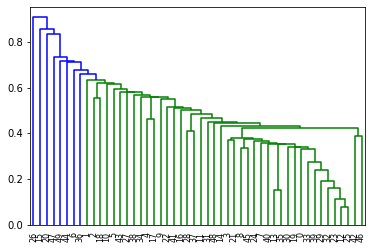

In [41]:
fig = plt.figure()
dn = hac.dendrogram(links)


plt.savefig('clusters+gam.png', dpi=400)


In [47]:
object_arr = np.arange(0,50)

c_matrix = np.zeros(int(len(object_arr)*(len(object_arr)-1)/2))
c_matrix_cc = np.zeros(int(len(object_arr)*(len(object_arr)-1)/2))

index = 0
for ii in range(0,len(object_arr)):
	obj1 = object_arr[ii]
	
	''' CC1 '''
	cc_file1 = cc_dir+'object'+str(obj1).zfill(4)+'_stats000.dat'
	
	read_in = np.loadtxt(cc_file1)

	time = read_in[0]
	data = read_in[1:]
	
	arr_time = np.logical_and(time >= -1000, time <= 2000)
	data = data[:,arr_time]
	
	cor_mean = data[0,::5]
# 	cor_err_d = cor_mean-data[1]
# 	cor_err_u = data[2]-cor_mean
	
	arr1 = np.logical_and(np.isfinite(cor_mean), cor_mean > -1.1)
	
	''' AC-gam '''
	ac_gam_file1 = gam_ac_dir+'object'+str(obj1).zfill(4)+'_auto_gam_stats000.dat'
	
	read_in = np.loadtxt(ac_gam_file1)
	time = read_in[0]
	data = read_in[1:]
	arr_time_acg = time <= 2000
	data = data[:,arr_time_acg]

	acg_mean1 = data[0,::5]
	
	arr1_acg = np.logical_and(np.isfinite(acg_mean1), acg_mean1 > -1.1)
	
	for jj in range(ii+1, len(object_arr)):
		obj2 = object_arr[jj]
		cc_file2 = cc_dir+'object'+str(obj2).zfill(4)+'_stats000.dat'

		read_in = np.loadtxt(cc_file2)
		data = read_in[1:]
		data = data[:,arr_time]

		cor_mean2 = data[0,::5]
# 		cor_err_d2 = cor_mean-data[1]
# 		cor_err_u2 = data[2]-cor_mean
		
		arr2 = np.logical_and(np.isfinite(cor_mean2), cor_mean > -1.1)
		arr_tot = np.logical_and(arr1, arr2)
		
		fac = 10.
		x_cc = np.arctan(fac*cor_mean[arr_tot])
		y_cc = np.arctan(fac*cor_mean2[arr_tot])
		
		dist_cc = np.sum((x_cc-y_cc)**2)
		
# 		cc_corr, cc_pval = pearsonr(x_cc,y_cc)
		
		
		''' AC-gam '''
		ac_gam_file2 = gam_ac_dir+'object'+str(obj2).zfill(4)+'_auto_gam_stats000.dat'

		read_in = np.loadtxt(ac_gam_file2)
		data = read_in[1:]
		data = data[:,arr_time_acg]

		acg_mean2 = data[0,::5]
		arr2_acg = np.logical_and(np.isfinite(acg_mean2), acg_mean2 > -1.1)
		
		arr_tot_acg = np.logical_and(arr1_acg, arr2_acg)
		x_acg = np.arctan(fac*acg_mean1[arr_tot_acg])
		y_acg = np.arctan(fac*acg_mean2[arr_tot_acg])
		
# 		acg_corr, acg_pval = pearsonr(x_acg, y_acg)
		dist_acg = np.sum((x_acg-y_acg)**2)
		
		c_matrix[index] = dist_cc + dist_acg
		c_matrix_cc[index] = dist_cc
# 		print([obj1, obj2], end='')
		index+= 1
	print(obj1, end=' ')
c_matrix_dist = c_matrix
c_matrix_dist_cc = c_matrix_cc
	
np.savetxt('dist2_c_matrix.dat', c_matrix_dist)
np.savetxt('dist2_cc_c_matrix.dat', c_matrix_dist_cc)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

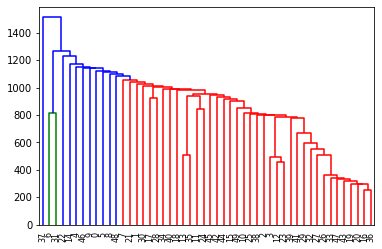

In [48]:
links = hac.linkage(c_matrix_dist_cc)
fig = plt.figure()
dn = hac.dendrogram(links)


plt.savefig('clusters_dist.png', dpi=400)

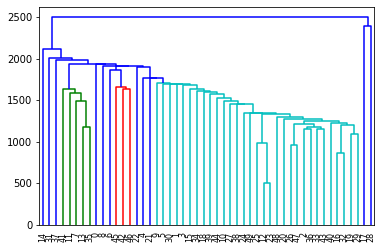

In [49]:
links = hac.linkage(c_matrix_dist)
fig = plt.figure()
dn = hac.dendrogram(links)


plt.savefig('clusters_dist+gam.png', dpi=400)